# PCA
Only group filtering but no TIC normalization

In [1]:
library(glue)

In [2]:
exp_label = "postGroupFilt"

In [3]:
input_matrix_name = "../../output/preproc_fultab_wt_stemCell67//groupFil0.3_RPneg_blkM_featab.csv"
meta_data_name = "../../../seq/RPneg_addgrp.csv"

In [4]:
rn = sample(1:100, 1)
output_dir <- glue("../../output/preproc_fultab_wt_stemCell67/PCA/postGrpFilt_{rn}")
dir.create(output_dir)

In [5]:
df = read.table(input_matrix_name, header = TRUE,sep = ',',row.name = 1)
meta_df = read.table(meta_data_name, header = TRUE, sep = ',')

In [6]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3,Klof2_1,Klof2_2,Klof2_3
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F3,417.0360,20.78,18.64,23.29,626,83870590,1.0,0.87,2479,16,⋯,3491983,1715865,2483791,1925091,3148828,16568160,NA,NA,NA,NA
F5,452.2853,33.09,30.49,35.45,1214,5313362,1.0,0.92,212,4,⋯,NA,1929205,NA,NA,NA,NA,NA,NA,NA,NA
F6,417.1018,188.43,187.60,189.42,627,1256567,1.0,0.71,141,4,⋯,321644,NA,NA,NA,NA,NA,NA,NA,NA,NA
F7,417.1018,190.25,189.42,191.07,627,1773050,1.0,0.90,301,5,⋯,305394,NA,NA,NA,NA,NA,NA,NA,NA,NA
F9,452.3398,247.79,245.29,250.39,1216,23341238,1.0,0.96,1418,9,⋯,2560669,3038194,NA,NA,2054675,NA,NA,NA,NA,NA
F10,417.1178,111.94,111.02,112.63,628,2510838,0.4,0.91,66,9,⋯,298913,284201,NA,252101,306803,NA,NA,NA,NA,NA


In [7]:
head(meta_df)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
6,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5


In [8]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [9]:
unique(meta_df$group)

[1] "Blank"     "Blank_std" "Qstd"      "pooled"    "Tn"        "CD8stem"  
[7] "CD8trans"  "CD8TD"

In [10]:
data.df = df[,grep('pooled\\_[0-9]+|CD8stem\\_[0-9]+|CD8TD\\_[0-9]+|CD8trans\\_[0-9]+|Tn\\_[0-9]+',colnames(df))]

In [11]:
if(any(data.df[!is.na(data.df)] > 10000)) {
    data.df[data.df == 0] = NA
    data.df.log2 = log2(data.df)
} else {
    data.df.log2 = data.df
}

In [12]:
head(data.df.log2)

,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F3,21.64296,20.12957,19.82593,22.01411,21.11937,21.58852,21.73562,20.71050,21.24411,20.87650,21.58638
F5,NA,20.55950,19.93471,18.66257,NA,NA,NA,20.87958,NA,NA,NA
F6,NA,18.48996,NA,18.63844,18.15210,NA,18.29511,NA,NA,NA,NA
F7,NA,18.58447,NA,18.67223,18.33006,NA,18.22031,NA,NA,NA,NA
F9,21.26060,21.42441,21.53180,21.70289,21.40040,20.87058,21.28809,21.53478,NA,NA,20.97048
F10,18.05151,NA,18.02748,18.28135,17.99747,18.11866,18.18937,18.11655,NA,17.94364,18.22695


In [13]:
sub_meta_df = meta_df[colnames(data.df.log2),]

In [14]:
sub_meta_df

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
pooled_1,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5
Tn_250K_1,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B1,5
Tn_250K_2,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B2,5
CD8stem_250K_1,Unknown,MT_20230308_016,CD8T_stem_250k_01_02,CD8stem_250K_1,250000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B5,5
CD8stem_300K_2,Unknown,MT_20230308_018,CD8T_stem_300k_01_02,CD8stem_300K_2,300000,CD8stem,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B6,5
pooled_2,Unknown,MT_20230308_020,pooledsample_04,pooled_2,NA,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A4,5
CD8trans_350K_1,Unknown,MT_20230308_022,CD8T_trans_350k_01_02,CD8trans_350K_1,350000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B7,5
CD8trans_250K_2,Unknown,MT_20230308_024,CD8T_trans_250k_01_02,CD8trans_250K_2,250000,CD8trans,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B8,5
CD8TD_750K_1,Unknown,MT_20230308_026,CD8T_TD_750k_01_02,CD8TD_750K_1,750000,CD8TD,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:B9,5


In [15]:
library(stringr)
ordered_group_v = str_extract(colnames(data.df.log2),'pooled|Tn|CD8stem|CD8trans|CD8TD')

In [16]:
color_v = c('pooled' = "#888888", 
            'Tn' = "#008000",
            'CD8stem' = '#0000ff',
            'CD8trans' = '#00fff0',
            'CD8TD' = '#ff0000')[ordered_group_v]

In [17]:
color_v

pooled        Tn        Tn   CD8stem   CD8stem    pooled  CD8trans  CD8trans 
"#888888" "#008000" "#008000" "#0000ff" "#0000ff" "#888888" "#00fff0" "#00fff0" 
    CD8TD     CD8TD    pooled 
"#ff0000" "#ff0000" "#888888"

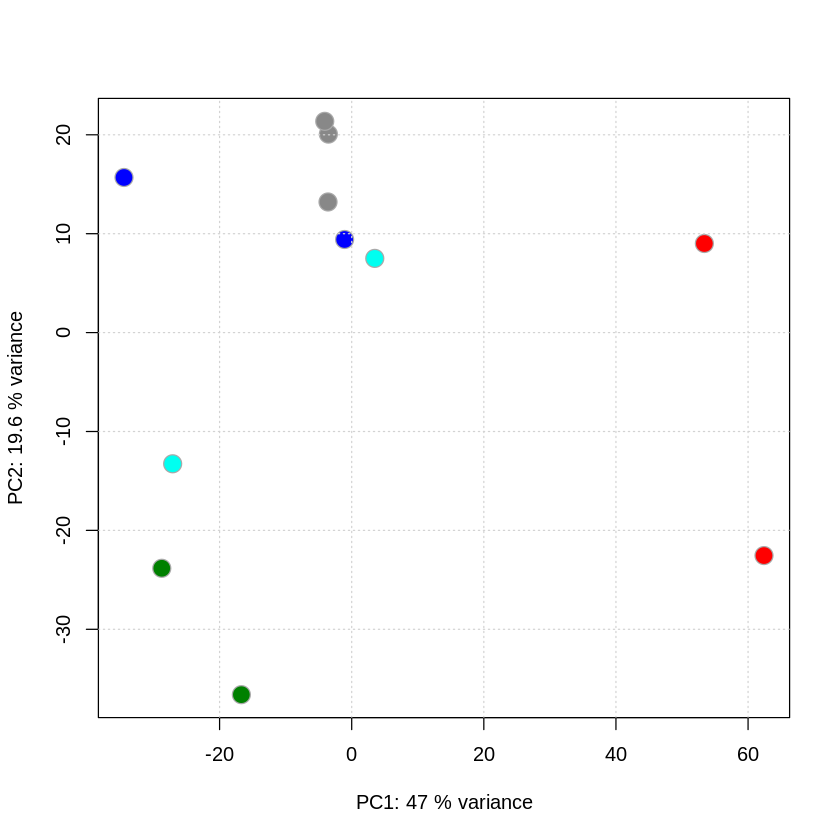

In [18]:
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [19]:
# print the pdf
pdf(file.path(output_dir,glue("{exp_label}_omit_featureswtNA_PCA_wt_labels.pdf")))
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
     pos = 3, cex = 1),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
     
dev.off()

png 
  2

-----

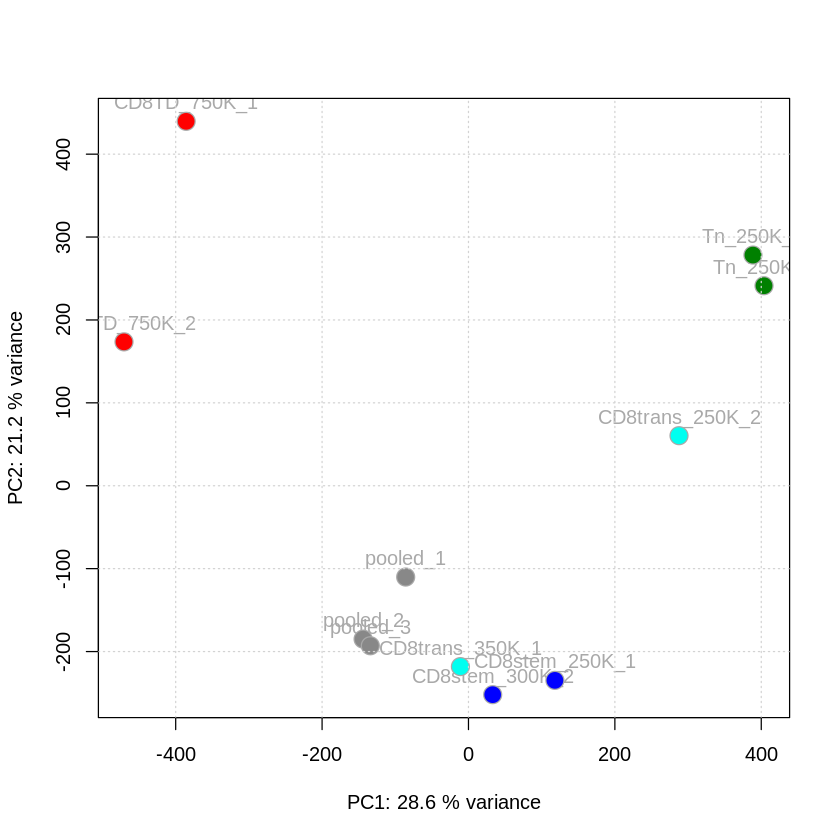

In [20]:
#' Perform the PCA omitting all features with an NA in any of the
data.df.log2.zero = data.df.log2
data.df.log2.zero[is.na(data.df.log2.zero)] = 0
pc <- prcomp(t(data.df.log2.zero), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
     pos = 3, cex = 1),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
     

In [21]:
#' Perform the PCA omitting all features with an NA in any of the
data.df.log2.zero = data.df.log2
data.df.log2.zero[is.na(data.df.log2.zero)] = 0

pdf(file.path(output_dir,glue("{exp_label}_keepZero_in_PCA_decomp_wt_labels.pdf")))
pc <- prcomp(t(data.df.log2.zero), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2),
     pos = 3, cex = 1),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
     
dev.off()

png 
  2